# Deep Learning Project: Pet Classifier using CNN

Prepration
- Extract the ipynb file and the data in the same folder

Data Set
- A production grade program as 10,000 training images
- This is a small program with 20 images of cats and 20 images of dogs. 
- The evaluation set has 10 images of cats and 10 images of dogs

Runs
- The student is expected to run the 100-300 training step
- A production grade code would have about 20k-50k training steps

### Import modules

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.


In [2]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
TRAIN_DIR = './data/train'
TEST_DIR = './data/test'

In [3]:
folders = os.listdir(TRAIN_DIR)

In [4]:
folders

['cats', 'dogs']

In [5]:
catfiles = os.listdir(TRAIN_DIR + '/'+ folders[0])
catfiles

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jp

In [6]:
dogfiles = os.listdir(TRAIN_DIR+'/'+folders[1])
dogfiles

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.1000.jpg',
 'dog.10000.jpg',
 'dog.10001.jpg',
 'dog.10002.jpg',
 'dog.10003.jpg',
 'dog.10004.jpg',
 'dog.10005.jpg',
 'dog.10006.jpg',
 'dog.10007.jpg',
 'dog.10008.jpg',
 'dog.10009.jpg',
 'dog.1001.jpg',
 'dog.10010.jpg',
 'dog.10011.jpg',
 'dog.10012.jpg',
 'dog.10013.jpg',
 'dog.10014.jpg',
 'dog.10015.jpg',
 'dog.10016.jpg',
 'dog.10017.jpg',
 'dog.10018.jpg',
 'dog.10019.jpg',
 'dog.1002.jpg',
 'dog.10020.jpg',
 'dog.10021.jpg',
 'dog.10022.jpg',
 'dog.10023.jpg',
 'dog.10024.jpg',
 'dog.10025.jpg',
 'dog.10026.jpg',
 'dog.10027.jpg',
 'dog.10028.jpg',
 'dog.10029.jpg',
 'dog.1003.jpg',
 'dog.10030.jpg',
 'dog.10031.jpg',
 'dog.10032.jpg',
 'dog.10033.jpg',
 'dog.10034.jpg',
 'dog.10035.jpg',
 'dog.10036.jp

In [7]:
filenames = []
categories =[]
for file in catfiles:
    filenames.append(TRAIN_DIR + '/' + folders[0] + '/' + file)
    categories.append(1)
for file in dogfiles:
    filenames.append(TRAIN_DIR + '/' + folders[1] + '/' + file)
    categories.append(0)
df = pd.DataFrame({'filename': filenames, 
                  'category': categories})

In [8]:
df.head()

,filename,category
0,./data/train/cats/1.jpg,1
1,./data/train/cats/10.jpg,1
2,./data/train/cats/11.jpg,1
3,./data/train/cats/12.jpg,1
4,./data/train/cats/13.jpg,1


In [9]:
df.tail()

,filename,category
25035,./data/train/dogs/dog.9995.jpg,0
25036,./data/train/dogs/dog.9996.jpg,0
25037,./data/train/dogs/dog.9997.jpg,0
25038,./data/train/dogs/dog.9998.jpg,0
25039,./data/train/dogs/dog.9999.jpg,0


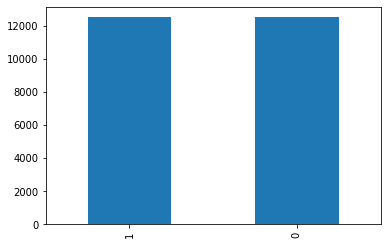

In [10]:
df['category'].value_counts().plot.bar()

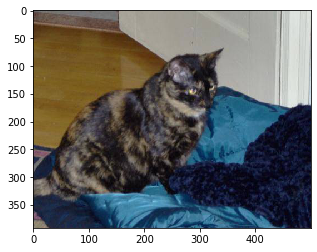

In [11]:
sample = random.choice(df['filename'])
image = load_img(sample)
plt.imshow(image)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import Activation, BatchNormalization

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, (3, 3), 
                 activation='relu', 
                 input_shape=(IMAGE_WIDTH, 
                              IMAGE_HEIGHT, 
                              IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [16]:
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

earlystop = EarlyStopping(patience=10)

In [22]:
callbacks = [earlystop, learning_rate_reduction]

In [23]:
df['category'] = df['category'].replace({0: 'dog', 1:'cat'})

In [24]:
train_df, val_df = train_test_split(df, test_size=0.20, random_state=10)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

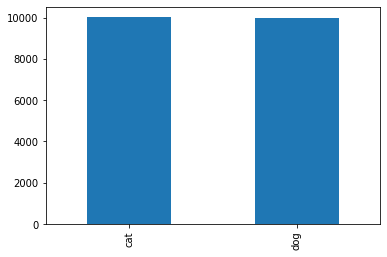

In [25]:
train_df['category'].value_counts().plot.bar()

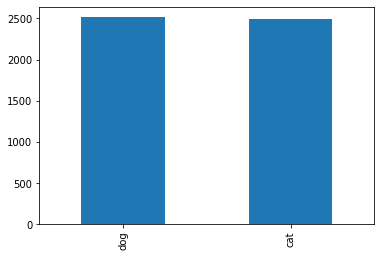

In [26]:
val_df['category'].value_counts().plot.bar()

In [27]:
total_train = train_df.shape[0]
total_val = val_df.shape[0]
batch_size = 4

In [28]:
train_datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        batch_size=batch_size)

Found 20032 validated image filenames belonging to 2 classes.


In [29]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
        val_df,
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        batch_size=batch_size)

Found 5008 validated image filenames belonging to 2 classes.


In [30]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
        example_df,
        x_col='filename',
        y_col='category',
        traget_size=IMAGE_SIZE,
        class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


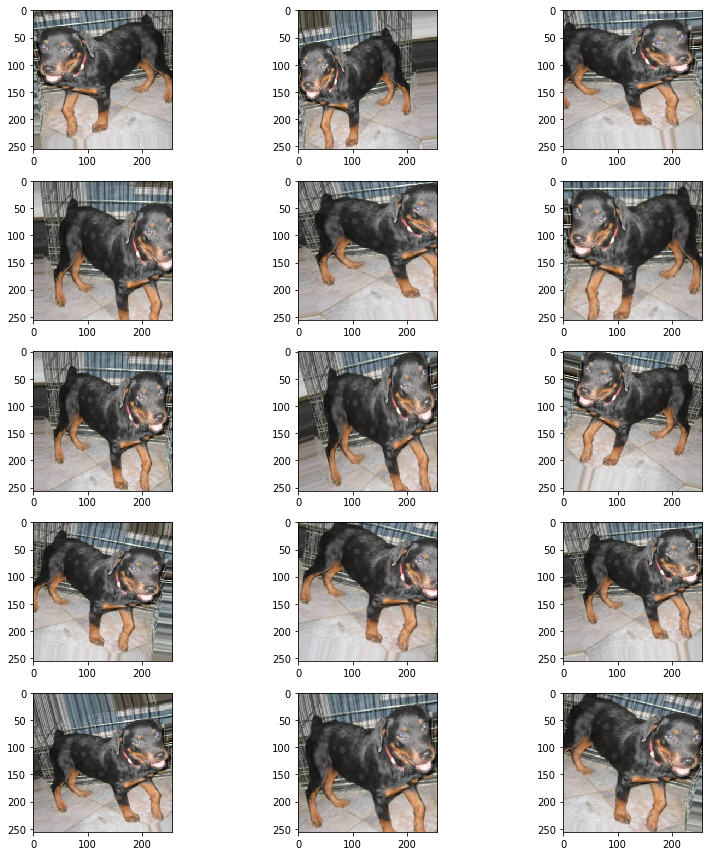

In [31]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [32]:
epochs = 50

history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=total_val//batch_size,
        steps_per_epoch=total_train//batch_size,
        callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
5008/5008 [==============================] - 130s 26ms/step - loss: 0.8023 - acc: 0.5415 - val_loss: 0.7394 - val_acc: 0.5136
Epoch 2/50
5008/5008 [==============================] - 128s 26ms/step - loss: 0.7398 - acc: 0.5493 - val_loss: 0.6994 - val_acc: 0.5517
Epoch 3/50
5008/5008 [==============================] - 128s 25ms/step - loss: 0.7277 - acc: 0.5439 - val_loss: 0.6641 - val_acc: 0.5925
Epoch 4/50
5008/5008 [==============================] - 128s 26ms/step - loss: 0.7095 - acc: 0.5588 - val_loss: 0.6666 - val_acc: 0.6074
Epoch 5/50
5008/5008 [==============================] - 128s 26ms/step - loss: 0.6911 - acc: 0.5780 - val_loss: 0.6414 - val_acc: 0.6324
Epoch 6/50
5008/5008 [==============================] - 128s 26ms/step - loss: 0.6849 - acc: 0.5826 - val_loss: 0.6671 - val_acc: 0.5948
Epoch 7/50
5008/5008 [==============================] - 128s 26ms/step - loss: 0.6767 - acc: 0.5860 - val_loss: 0.6265 - val_acc: 

In [33]:
model.save_weights('model.h5')

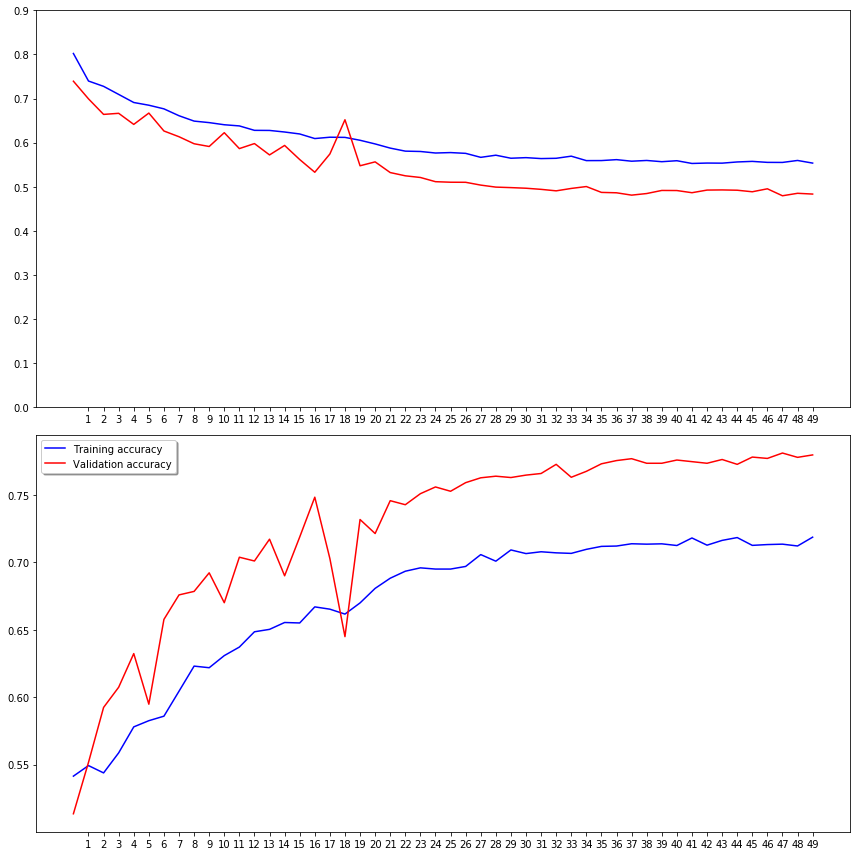

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()